# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [95]:
data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(5)

# df.to_csv('dados_clientes.csv', index = False)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

# Tratamento dos Dados

In [96]:
# TROCANDO ALGUNS VALORES DO DATAFRAME
df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].replace({'0': 'Sem Histórico', '1': 'Com Histórico'})
df['Imovel_Proprio'] = df['Imovel_Proprio'].replace({'0': 'Não Possui', '1': 'Possui'})
df['Estado_Civil'] = df['Estado_Civil'].replace({'Casamento': 'Casado(a)', 'Solteiro': 'Solteiro(a)'})

# CONVERTENDO AS COLUNAS PARA VALORES NUMÉRICOS
df[['Idade', 'Salário', 'Limite_Credito']] = df[['Idade', 'Salário', 'Limite_Credito']].astype(int)

# VERIFICANDO A TIPAGEM DAS COLUNAS
# print(df[['Idade', 'Salário', 'Limite_Credito']].dtypes)

df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,Sem Histórico,Casado(a),Não Possui
1,Joao,30,Médico,8000,4000,Sem Histórico,Casado(a),Não Possui
2,Charlie,35,Professor,5000,4000,Sem Histórico,Solteiro(a),Não Possui
3,David,40,Advogado,10000,1000,Com Histórico,Solteiro(a),Possui
4,Eva,45,Médico,12000,10000,Sem Histórico,Casado(a),Possui


# Análise Dos Dados

In [97]:
# TIRANDO A MÉDIA DO LIMITE DE CRÉDITO POR IDADE
media_limite_credito_por_idade = df.groupby('Idade')['Limite_Credito'].mean()
print(media_limite_credito_por_idade, '\n')

# TIRANDO A MÉDIA DO LIMITE DE CRÉDITO PELO SALÁRIO
media_limite_credito_por_salario = df.groupby('Salário')['Limite_Credito'].mean()
print(media_limite_credito_por_salario, '\n')

# TIRANDO A MÉDIA DE LIMITE DE CRÉDITO PELO HISTÓRICO DE INADIMPLÊNCIA
media_limite_credito_por_historico = df.groupby('Historico_Inadimplencia')['Limite_Credito'].mean()
print(media_limite_credito_por_historico, '\n')

# DESCOBRINDO O NÚMERO DE REGISTROS DE CADA CATEGORIA
print(df['Historico_Inadimplencia'].value_counts(), '\n')

# CRIANDO UMA FUNÇÃO PARA CALCULAR A DIFERENÇA PERCENTUAL ENTRE DOIS VALORES
def calcula_diff(valor_comparativo, valor_referencia):
    return ((valor_comparativo - valor_referencia) / valor_referencia) * 100

# CALCULANDO A DIFERENÇA ENTRE AS CATEGORIAS
cliente_inadimplente = media_limite_credito_por_historico.iloc[0]      # ---> ATRIBUINDO O VALOR CALCULADO DA CATEGORIA 1
cliente_sem_inadimplencia = media_limite_credito_por_historico.iloc[1] # ---> ATRIBUINDO O VALOR CALCULADO DA CATEGORIA 2

diff_inadimplencia = calcula_diff(cliente_sem_inadimplencia, cliente_inadimplente)  # ---> 288%

print(f'Diferença: {diff_inadimplencia:.0f}%' '\n')

# TIRANDO A MÉDIA DO LIMITE DE CRÉDITO PELO ESTADO CIVIL DO CLIENTE
media_limite_credito_por_estado_civil = df.groupby('Estado_Civil')['Limite_Credito'].mean()
print(media_limite_credito_por_estado_civil, '\n')

# CALCULANDO A DIFERENÇA ENTRE AS CATEGORIAS
casado = media_limite_credito_por_estado_civil.iloc[0]
solteiro = media_limite_credito_por_estado_civil.iloc[1]

# CALCULANDO A DIFERENÇA PERCENTUAL DO LIMITE DE CRÉDITO DE CLIENTES CASADOS DOS SOLTEIROS
diff_estado_civil = calcula_diff(casado, solteiro)
print(f'Diferença: {diff_estado_civil:.0f}%' '\n') # ---> 255%

# TIRANDO A MÉDIA DO LIMITE DE CRÉDITO ENTRE OS CLIENTES QUE POSSUEM IMOVÉIS E OS QUE NÃO POSSUEM
media_limite_credito_imovel = df.groupby('Imovel_Proprio')['Limite_Credito'].mean().sort_values(ascending = False)
print(media_limite_credito_imovel, '\n')

possui = media_limite_credito_imovel.iloc[0]
nao_possui = media_limite_credito_imovel.iloc[1]

diff_imovel = calcula_diff(possui, nao_possui)
print(f'Diferença: {diff_imovel:.0f}%' '\n')

# RANKEANDO AS PROFISSÕES COM MAIOR LIMITE DE CRÉDITO
media_limite_credito_por_profissao = df.groupby('Profissão')['Limite_Credito'].mean()
print(media_limite_credito_por_profissao, '\n')

Idade
22      500.0
24      250.0
25     2500.0
30     4000.0
35     4000.0
40     1000.0
45    10000.0
60     2000.0
Name: Limite_Credito, dtype: float64 

Salário
1200       500.0
1500       250.0
4500      2500.0
5000      4000.0
8000      4000.0
10000     1000.0
12000    10000.0
15000     2000.0
Name: Limite_Credito, dtype: float64 

Historico_Inadimplencia
Com Histórico    1083.333333
Sem Histórico    4200.000000
Name: Limite_Credito, dtype: float64 

Historico_Inadimplencia
Sem Histórico    5
Com Histórico    3
Name: count, dtype: int64 

Diferença: 288%

Estado_Civil
Casado(a)      5500.0
Solteiro(a)    1550.0
Name: Limite_Credito, dtype: float64 

Diferença: 255%

Imovel_Proprio
Possui        4333.333333
Não Possui    2250.000000
Name: Limite_Credito, dtype: float64 

Diferença: 93%

Profissão
Advogado      1000.0
Engenheiro    2250.0
Estudante      375.0
Médico        7000.0
Professor     4000.0
Name: Limite_Credito, dtype: float64 



# GRÁFICOS

## Profissão e Remuneração

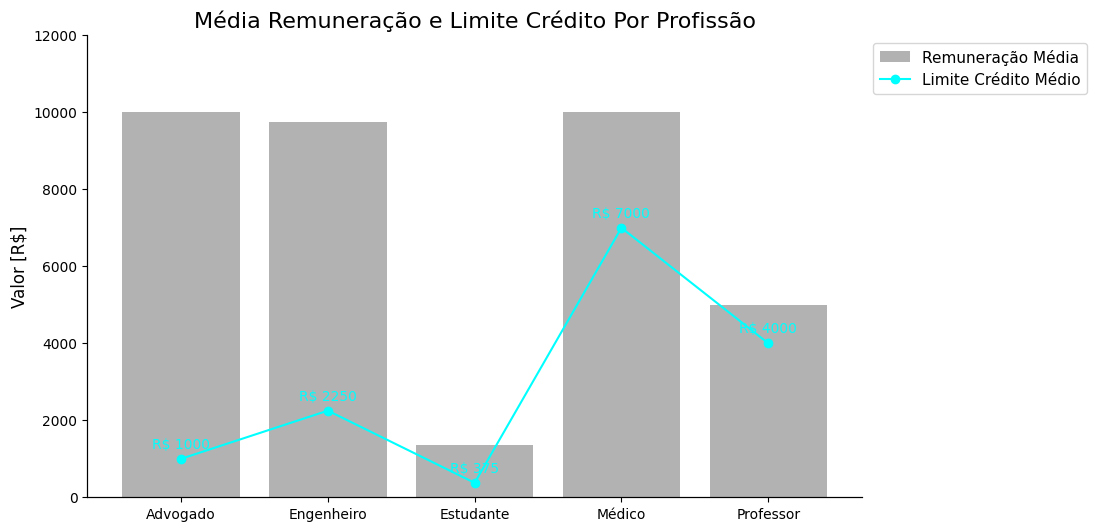

In [119]:
# DESCOBRINDO A MÉDIA DO SALÁRIO POR PROFISSÃO
media_salario_por_profissao = df.groupby('Profissão')['Salário'].mean()

# CRIANDO A FIGURA DO GRÁFICO
fig, ax1 = plt.subplots(figsize = (10, 6))

# GRÁFICO DE BARRAS
ax1.bar(media_salario_por_profissao.index, media_salario_por_profissao, color = 'gray', alpha = 0.6, label = 'Remuneração Média')
ax1.set_yticks(range(0, 14000, 2000))
ax1.set_ylabel("Valor [R$]", fontsize = 12)

# GRÁFICO DE LINHAS
ax2 = ax1.twinx()
ax2.plot(media_limite_credito_por_profissao.index, media_limite_credito_por_profissao, color = 'aqua', label = 'Limite Crédito Médio', marker = 'o')
ax2.set_yticks(range(0, 14000, 2000))
ax2.set_yticks([])

# RÓTULO DE DADOS DO GRÁFICO DE LINHA
for i, (x, y) in enumerate(zip(media_limite_credito_por_profissao.index, media_limite_credito_por_profissao)):
    ax2.text(
        x,
        y + 200,
        f'R$ {y:.0f}',
        ha = 'center',
        va = 'bottom',
        fontsize = 10,
        color = 'aqua'
    )

# LEGENDA
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc = 'upper right', bbox_to_anchor = (1.3, 1), fontsize = 11)

# PERSONALIZAÇÃO FINAL
plt.title("Média Remuneração e Limite Crédito Por Profissão", fontsize = 16)
ax1.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

plt.savefig('Media_Limite_Credito_Por_Profissao.png')
plt.show()



## Treemap Dados Cliente

In [121]:
# CRIANDO UM DATAFRAME INDEPENDENTE
df2 = df[['Historico_Inadimplencia', 'Estado_Civil', 'Imovel_Proprio', 'Limite_Credito']]

# PEQUENO TRATAMENTO PARA O GRÁFICO
df2[['Historico_Inadimplencia', 'Estado_Civil', 'Imovel_Proprio']] = df2[['Historico_Inadimplencia', 'Estado_Civil', 'Imovel_Proprio']].replace({'Sem Histórico': 'Sem Histórico de Inadimplência', 'Possui': 'Possui Imóvel'})

# TIRANDO A MÉDIA POR DADO FORNECIDO DO CLIENTE
media_limite_credito_por_dados_cliente = df2.groupby(['Historico_Inadimplencia', 'Estado_Civil', 'Imovel_Proprio'])['Limite_Credito'].mean().reset_index()

fig = px.treemap(
    media_limite_credito_por_dados_cliente,
    path = ['Historico_Inadimplencia', 'Estado_Civil', 'Imovel_Proprio'],
    values = 'Limite_Credito',
    title = 'Hierarquia de fatores categóricos associados a limites de crédito mais elevados',
    labels = {
        'Limite_Credito': 'Limite Crédito',
    },
    color = 'Limite_Credito',
    color_continuous_scale = 'temps',
    width = 1200,
    template = 'plotly_dark',
)

fig.update_traces( # ---> MUDANDO AS CORES DO GRÁFICO
    textfont = dict(color = "white")
)

fig.show()


C:\Users\leobo\AppData\Local\Temp\ipykernel_2340\2990054528.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Impacto Histórico de Inadimplência ---> PRINCIPAL FATOR

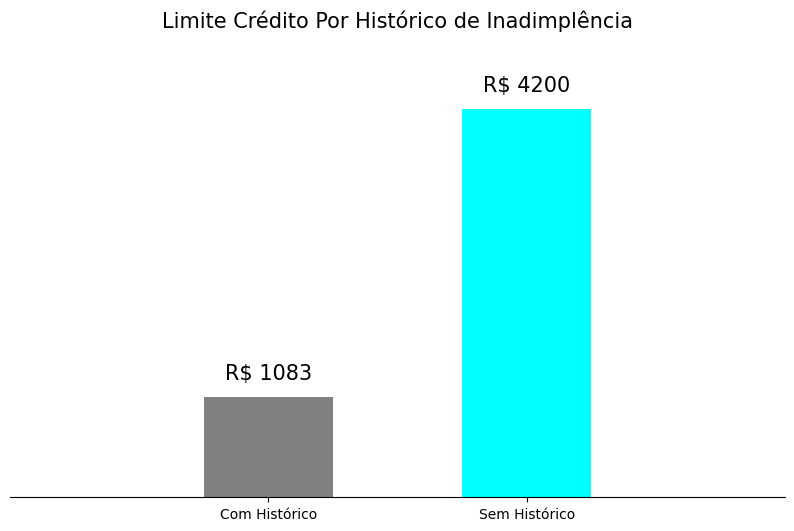

In [107]:
# PLOTANDO O IMPACTO DO HISTÓRICO DE INADIMPLÊNCIA
plt.figure(figsize = (10, 6))

# DEFININDO AS CORES
cor_destaque = 'aqua'
cor_neutra = 'gray'
indice_max = media_limite_credito_por_historico.argmax()
cor = [cor_destaque if i == indice_max else cor_neutra for i in range(len(media_limite_credito_por_historico))]

# PLOTANDO O GRÁFICO
plt.bar(media_limite_credito_por_historico.index, media_limite_credito_por_historico, color = cor, width = 0.5)

# PERSONALIZANDO
# RÓTULOS DE DADOS
for i, valorY in enumerate(media_limite_credito_por_historico):
    plt.text(
        i,
        valorY + 150,
        f'R$ {valorY:.0f}',
        ha = 'center',
        va = 'bottom',
        fontsize = '15'
    )

# EIXOS
plt.yticks(range(0, 5500, 500))
plt.yticks([])
plt.xlim(-1, len(media_limite_credito_por_historico))

# OCULTANDO ALGUMAS LINHAS LATERAIS DO GRÁFICO
for spine in [['left', 'top',  'right']]:
    plt.gca().spines[spine].set_visible(False)

# TÍTULOS
plt.title("Limite Crédito Por Histórico de Inadimplência", fontsize = 15)
plt.savefig('Dif_Limite_Credito_Inadimplencia.png') # SALVANDO O GRÁFICO COMO PNG
plt.show()


